In [1]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def get(data,index):
    l = []
    for d in data:
        l.append(d[index])
    return l

def normalize(vs):
    minb = min(B)
    maxb = max(B)
    l = []
    for v in vs:
        l.append((v-minb)/(maxb-minb))
    return np.array(l)
import json

def load(filepath):
    with open(filepath,'r') as fh:
        obj = json.loads(fh.read())
    dataset = {}
    for idx,cat in enumerate(obj['groups']['values']):
        key = str(cat)
        if not key in dataset:
            dataset[key] = {"X":[],"D":[],"B":[],"N":[]}
    
        pars = dict(zip(obj['params']['fields'], \
                           obj['params']['values'][idx]))
        expect = dict(zip(obj['expected']['fields'], \
                        obj['expected']['values'][idx]))
        meas = dict(zip(obj['observed']['fields'], \
                        obj['observed']['values'][idx]))
        
        dataset[key]['X'].append(list(pars.values()))
        dataset[key]['D'].append(expect['output'])
        dataset[key]['B'].append(meas['bias'])
        dataset[key]['N'].append(meas['noise'])
    return dataset


In [51]:
filepath = "../../outputs/datasets/adc_0_3_0_0.json"
dataset = load(filepath)
keys = list(dataset.keys())
for k in keys:
    print(k)
print("=====")
k = keys[1]
D = list(map(lambda d: (d-128.0)/128.0, dataset[k]['D']))
B = list(map(lambda d: d/128.0, dataset[k]['B']))
n = len(B)
print(n)

[u'medium', u'false', u'false', u'false', u'false', u'false', u'out0']
[u'high', u'false', u'false', u'false', u'false', u'false', u'out0']
=====
20


In [52]:
targ = np.array(list(map(lambda i: D[i], range(n))))
bias = np.array(B)
meas = np.array(list(map(lambda i: B[i]+D[i], range(n))))
print("targ: [%f,%f]" % (min(targ),max(targ)))
print("bias: [%f,%f]" % (min(bias),max(bias)))
print("meas: [%f,%f]" % (min(meas),max(meas)))

targ: [-1.000000,0.892578]
bias: [-0.127500,0.156250]
meas: [-0.843750,0.765078]


In [53]:
def nonlin_fit(xdata,a,b):
    x = xdata
    result = (a)*(x) + b
    return result

In [54]:
(a,b),corrs = scipy.optimize.curve_fit(nonlin_fit, targ, meas)
print(a,b)

(0.84793098386366494, 0.0062814416165271059)


In [55]:
def predict(v):
    return a*v + b

In [56]:
pred = list(map(lambda i: predict(targ[i]), range(n)))

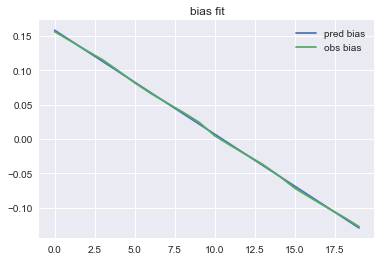

In [57]:
plt.plot(pred-targ,label='pred bias')
plt.plot(bias,label='obs bias')
plt.title("bias fit")
plt.legend()

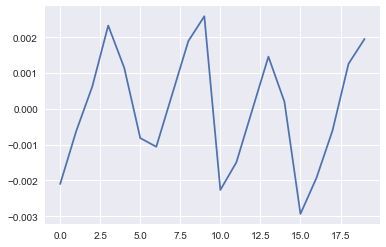

In [58]:
corr_bias = bias-(pred-targ)
plt.plot(corr_bias, label="corr bias")

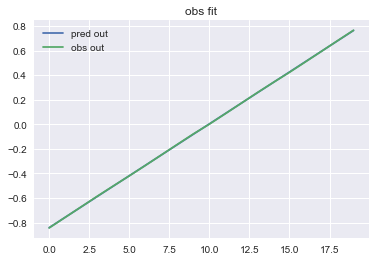

In [59]:
plt.plot(pred,label='pred out')
plt.plot(meas,label='obs out')
plt.title("obs fit")
plt.legend()

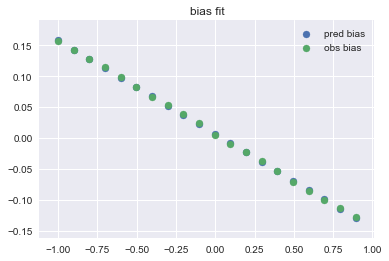

In [60]:
plt.scatter(targ,pred-targ,label='pred bias')
plt.scatter(targ,bias,label='obs bias')
plt.title("bias fit")
plt.legend()